In [2]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp = []
for species in ['human', 'mouse', 'drosophila']:
    if species == 'drosophila':
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
    else:
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
    for fname in ['hic_gene_none_inter_1_percent_per_chr.csv']:
        
        df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

        df['val'] = 1

        go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])

        go_table = go_table.fillna(0)

        go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])


        #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

        df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')


        go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id_jac_sim')
        GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

        from scipy.stats import mannwhitneyu
        import scipy.stats as stats
        z_list = []
        z_p_dict = []
        for go_id in GO_groups["go_id"].tolist():

            try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()
                


                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
            except:
                print (go_id)
                z_list.append(np.nan)
                z_p_dict.append(np.nan)

        auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
        auc_GO_terms_manw['species'] = species
        auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
        p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
        auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
        auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
        auc_GO_terms_manw_three_list_hic_exp.append(auc_GO_terms_manw)


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023
GO:0030555
GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp_cis_trans = []
for species in ['human']:
 for type_of_con in ['intra', 'inter']:
    
    if (species == 'drosophila') or type_of_con == 'intra':
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/{type_of_con}_only/'
        fname = f'hic_gene_none_{type_of_con}_1_percent_per_chr.csv'
    else:
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/{type_of_con}_only/'
        fname = f'hic_gene_none_{type_of_con}_1_percent_per_chr.csv'
    #for fname in [f'hic_gene_none_{type_of_con}_1_percent_per_chr.csv']:
        
        df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

        df['val'] = 1

        go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])

        go_table = go_table.fillna(0)

        go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])


        #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

        df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')


        go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id_jac_sim')
        GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

        from scipy.stats import mannwhitneyu
        import scipy.stats as stats
        z_list = []
        z_p_dict = []
        for go_id in GO_groups["go_id"].tolist():

            try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()
                


                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
            except:
                print (go_id)
                z_list.append(np.nan)
                z_p_dict.append(np.nan)

        auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
        auc_GO_terms_manw['species'] = species
        auc_GO_terms_manw['type_of_con'] = type_of_con
        
        auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
        p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
        auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
        auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
        auc_GO_terms_manw_three_list_hic_exp_cis_trans.append(auc_GO_terms_manw)


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023
GO:0030555
GO:0043234


In [167]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp_subset = []
species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
                
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            if species == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                    fname = 'hic_gene_KR_inter_1_percent_per_chr.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                    fname = 'hic_gene_KR_inter_1_percent_per_chr.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_jac_sim')



            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(dj, left_on=go_table.index, right_on='gene_id_jac_sim')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc_y'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc_y'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_exp_subset.append(auc_GO_terms_manw)


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555
GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [77]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_hic = []
species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_one_sided/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_one_sided/'
                fname = f'hic_gene_KR_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            if species_2 == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/inter_one_sided/'
                    fname = f'hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_one_sided/'
                    fname = f'hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species_2}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_one_sided/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id_exp_file')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_hic.append(auc_GO_terms_manw)


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_hic_from_human = []

for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/1kbp_raw/max/inter_only/'
                fname = f'hic_gene_none_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                fname = f'hic_gene_none_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            if species_2 == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/inter_only/'
                    fname = f'hic_gene_none_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/'
                    fname = f'hic_gene_none_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species_2}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_none_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id_exp_file')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_hic_from_human.append(auc_GO_terms_manw)


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0051301
GO:0051604
GO:0071554
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234
GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_hic_both_ways = []
species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):


            fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
            fname = f'hic_gene_none_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'

            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')

            fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/'
            fname = f'hic_gene_none_inter_10_percent_per_chr_{species}_aggregates_10kbp_raw.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_none_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(dj, left_on=go_table.index, right_on='gene_id_jac_sim_x')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_hic_hic_both_ways.append(auc_GO_terms_manw)


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555
GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_coexp = []

species_list = ['human', 'mouse', 'drosophila']
for species, species_2 in zip(['human', 'human', 'mouse'], ['mouse', 'drosophila', 'drosophila']):
    

            df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/coexp_consv/coexp_intra_only_10_percent_per_chr_{species}_{species_2}.csv', sep='\t')



            df_hic_auc_2 = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/coexp_consv/coexp_intra_only_10_percent_per_chr_{species_2}_{species}.csv', sep='\t')
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on='gene_id_jac_sim', right_on='gene_id_exp_file')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            #print (dj)


            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

            df['val'] = 1

            go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])


            go_table = go_table.fillna(0)

            go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])

            #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

            go_df_scores = go_table.merge(dj, left_on=go_table.index, right_on='gene_id_jac_sim_x')
            GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])

            from scipy.stats import mannwhitneyu
            import scipy.stats as stats
            z_list = []
            z_p_dict = []
            for go_id in GO_groups["go_id"].tolist():

                try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['auc'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['auc'].tolist()

                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)
                    #print (p, p_val)
                except:
                    print (go_id)
                    z_list.append(np.nan)
                    z_p_dict.append(np.nan)

            auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list)), columns=['id', 'P_val_agg', 'U1_stat'])
            auc_GO_terms_manw['species'] = f'{species}_{species_2}'
            
            auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
            p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
            auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
            auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
            auc_GO_terms_manw_three_list_coexp.append(auc_GO_terms_manw)
            

/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555
GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0030555


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0000988
GO:0001071
GO:0004871
GO:0005578
GO:0005618
GO:0006461
GO:0007067
GO:0008565
GO:0009536
GO:0009579
GO:0015979
GO:0016023


/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd


GO:0043234


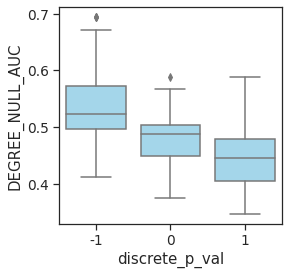

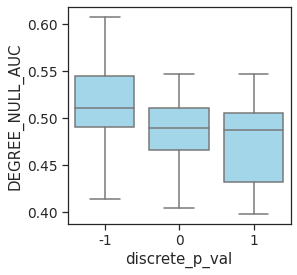

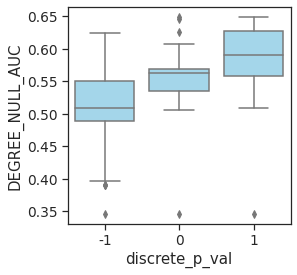

In [404]:
egad_intra = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/hic_gene_intra_KR_egad_intra_only_type2.csv', sep='\t')



egad_inter = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/hic_gene_gw_KR_KR_egad_inter_only.csv', sep='\t')



egad_dist = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/human_dist_egad_intra_only.csv', sep='\t')

auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')
#df_whole = df_whole[df_whole['X.2'] == 'cellular_component']
for df_2d_s in [egad_dist, egad_intra, egad_inter, ]:
    fig, ax = plt.subplots()

    df_2d = df_2d_s.merge(df_whole, left_on='Unnamed: 0', right_on='X')


    df_2d['discrete_p_val'] = [1 if x <=0.05 else -1 if x>=0.95 else 0 for x in df_2d['adjusted_P_val_agg']]
    
    #sns.boxplot(data=df_2d, x='discrete_p_val', y='AUC', color='#98DBF6')
    sns.boxplot(data=df_2d, x='discrete_p_val', y='DEGREE_NULL_AUC', color='#98DBF6')
    #sns.regplot(data=df_2d[df_2d['species']=='human'], y='adjusted_P_val_agg', x='AUC')

    df_2d['AUC_d'] = df_2d['AUC'] * 10
    df_2d['AUC_d'] = df_2d['AUC_d'].astype('int')
    #sns.boxplot(data=df_2d[df_2d['species']=='human'], y='adjusted_P_val_agg', x='AUC_d', color='#98DBF6')
    plt.plot()
    
    df_2d['DEGREE_NULL_AUC_d'] = df_2d['DEGREE_NULL_AUC'] * 10
    df_2d['DEGREE_NULL_AUC_d'] = df_2d['DEGREE_NULL_AUC_d'].astype('int')
    #sns.violinplot(data=df_2d[df_2d['species']=='human'], y='adjusted_P_val_agg', x='DEGREE_NULL_AUC_d', color='#98DBF6')



In [ ]:
auc_GO_terms_manw_three_list_coexp

auc_GO_terms_manw_three_list_hic_hic_both_ways
auc_GO_terms_manw_three_list_hic_hic
auc_GO_terms_manw_three_list_hic_exp
auc_GO_terms_manw_three_list_hic_exp_subset
auc_GO_terms_manw_three_list_hic_hic_from_human




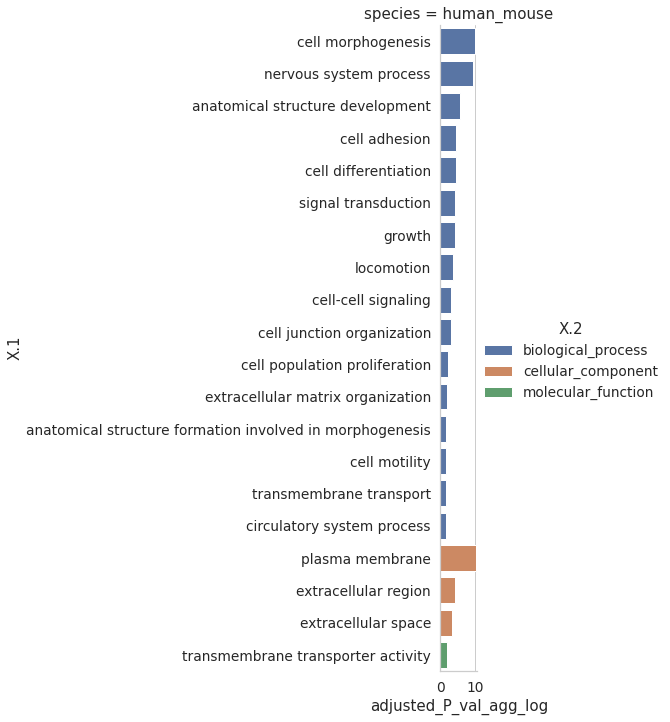

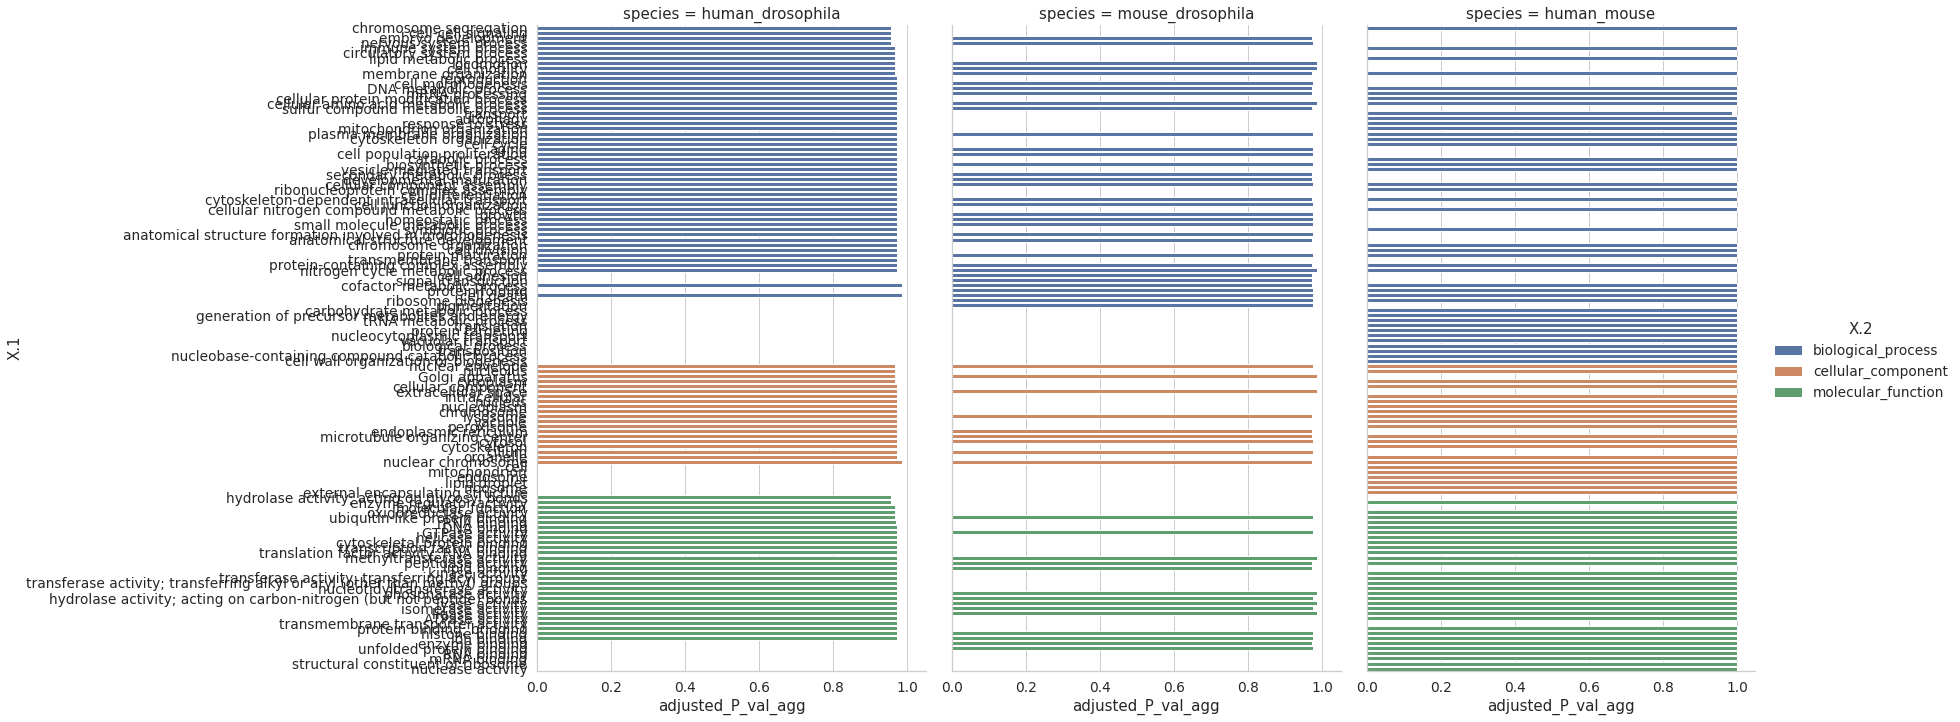

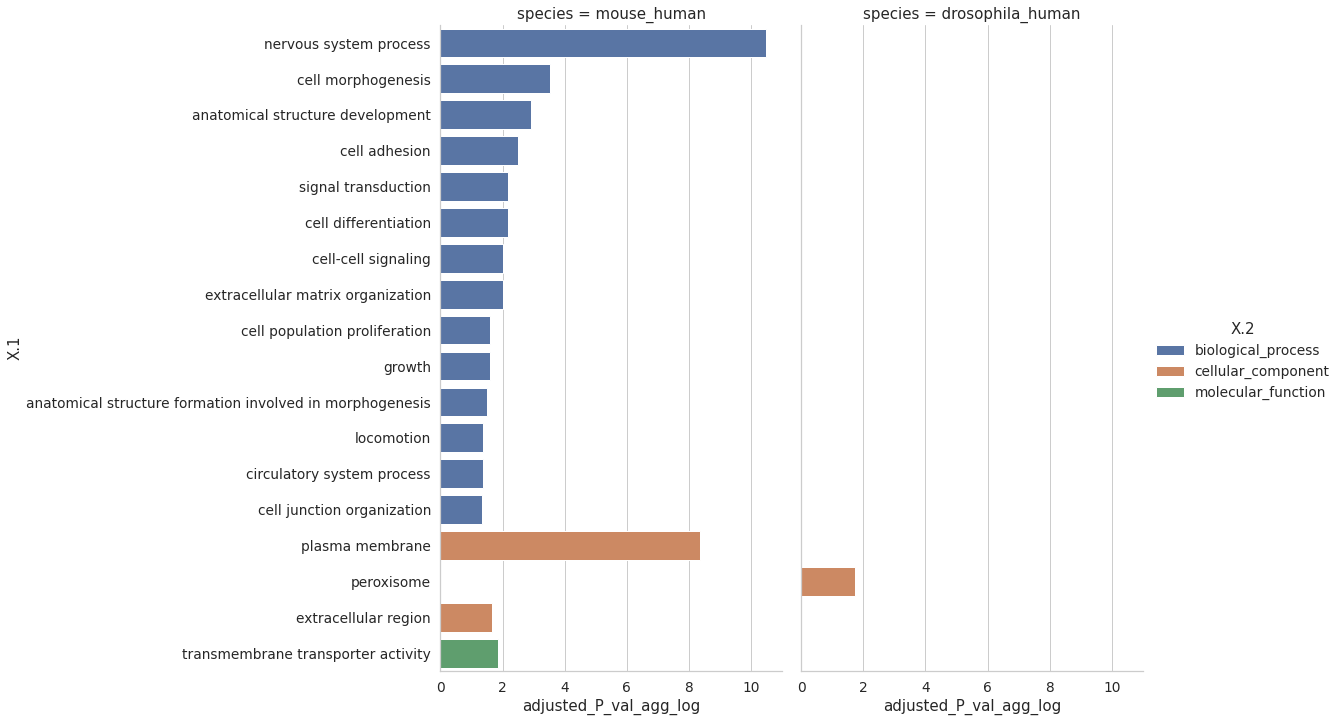

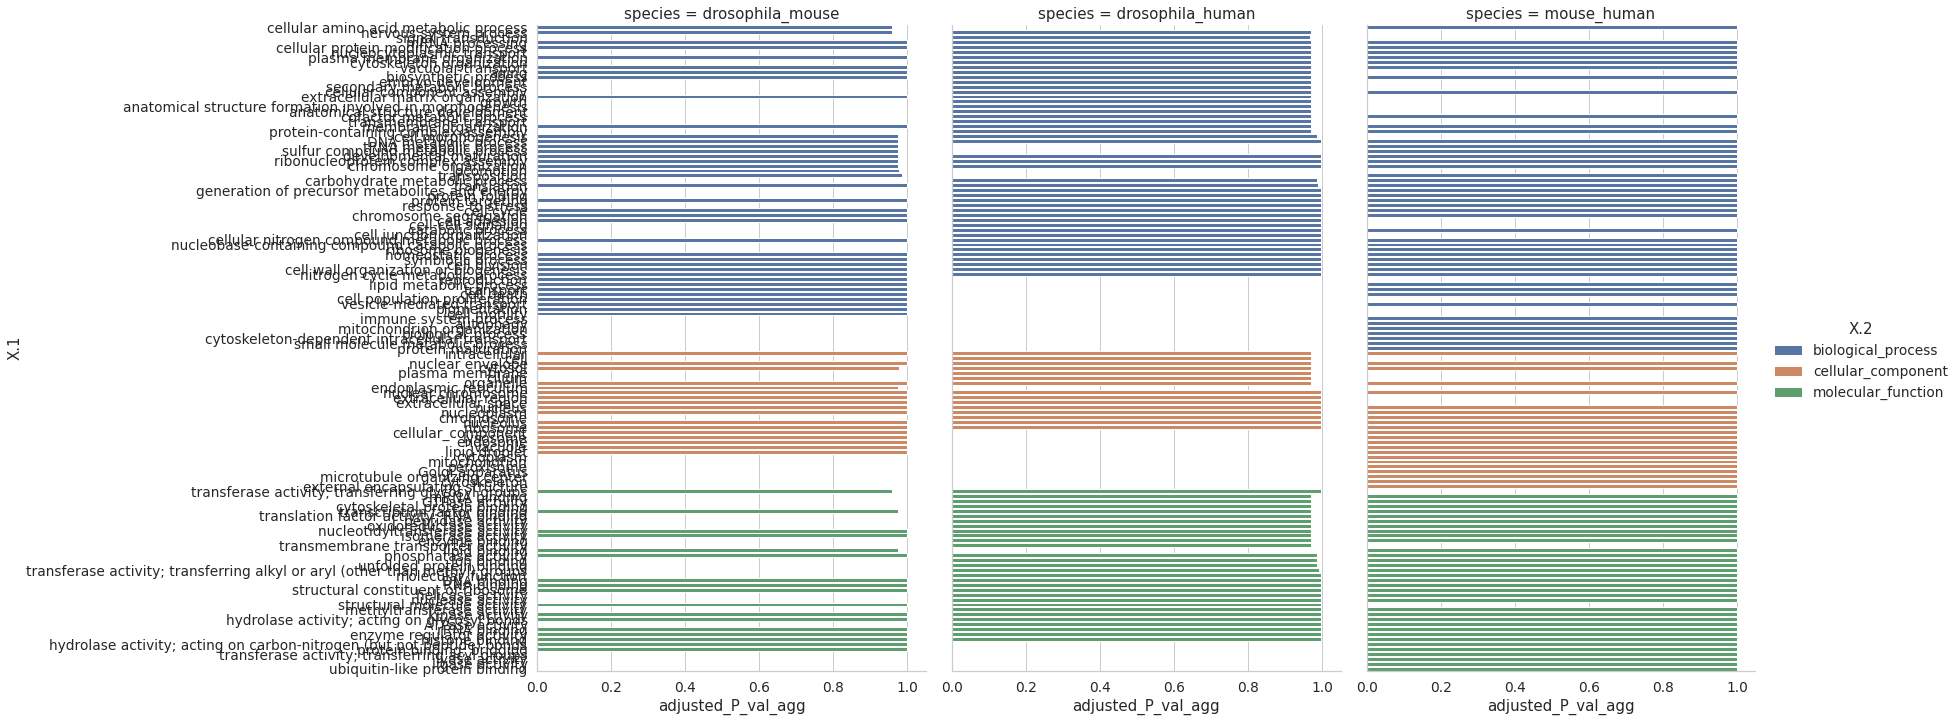

In [974]:
for list_type in [auc_GO_terms_manw_three_list_hic_hic_from_human, auc_GO_terms_manw_three_list_hic_hic]:
    auc_GO_terms_manw = pd.concat(list_type)

    df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')

    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]
    sns.catplot(data=df_whole[df_whole['adjusted_P_val_agg'] <= 0.05].sort_values(['X.2', 'adjusted_P_val_agg']), y='X.1', x='adjusted_P_val_agg_log', hue='X.2', height=10, aspect=8/9.5, kind='bar', dodge=False, col='species')

    sns.catplot(data=df_whole[df_whole['adjusted_P_val_agg'] >= 0.95].sort_values(['X.2', 'adjusted_P_val_agg']), y='X.1', x='adjusted_P_val_agg', hue='X.2', height=10, aspect=8/9.5, kind='bar', dodge=False, col='species')


type_of_con                                          inter
X.1                                                       
cell wall organization or biogenesis              1.000000
cellular amino acid metabolic process             1.000000
cellular nitrogen compound metabolic process      1.000000
cofactor metabolic process                        1.000000
generation of precursor metabolites and energy    1.000000
immune system process                             1.000000
mitochondrion organization                        1.000000
nitrogen cycle metabolic process                  0.982304
nucleobase-containing compound catabolic process  1.000000
protein targeting                                 1.000000
ribonucleoprotein complex assembly                1.000000
ribosome biogenesis                               1.000000
secondary metabolic process                       1.000000
small molecule metabolic process                  1.000000
sulfur compound metabolic process                 1.0000

KeyError: 'intra'

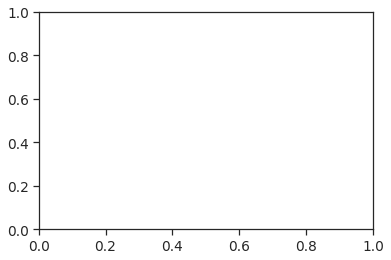

In [63]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp_cis_trans)


df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]
#df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(1-x) for x in df_whole['adjusted_P_val_agg']]

#print (df_whole)


fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.axes_style("white")
sns.set_style("ticks")
#sns.despine()
df_whole_mp = df_whole[df_whole['X.2'] == 'biological_process']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] > 0.95]
#print (df_whole_mp)
df_hic_exp_enrich = df_whole_mp[['type_of_con', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'type_of_con'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp_enrich.fillna(0, inplace=True)
df_tmp = df_whole_mp[['type_of_con', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'type_of_con'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
#df_tmp['sort_col'] = df_tmp['drosophila'] + df_tmp['human'] + df_tmp['mouse']
print (df_tmp)
df_tmp['sort_col'] = df_tmp['inter'] + df_tmp['intra']
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['inter', 'intra']].plot(kind='barh', stacked=True, figsize=(4, 9), zorder=2, color={"inter": "#3CB7E8", "intra": "#E83B43"} , ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
sns.set_style("ticks")

fig, ax = plt.subplots()
df_whole_mp = df_whole[df_whole['X.2'] == 'biological_process']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] < 0.05]
df_hic_exp_enrich = df_whole_mp[['type_of_con', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'type_of_con'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp_enrich.fillna(0, inplace=True)
df_tmp = df_whole_mp[['type_of_con', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'type_of_con'])['adjusted_P_val_agg_log'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] = df_tmp['inter'] + df_tmp['intra']
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['inter', 'intra']].plot(kind='barh', stacked=False, figsize=(4, 8), zorder=2, color={"inter": "#3CB7E8", "intra": "#E83B43"} , ax=ax, width=0.8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/hic_coexp_go_depleted.pdf', transparent=True, bbox_inches='tight')




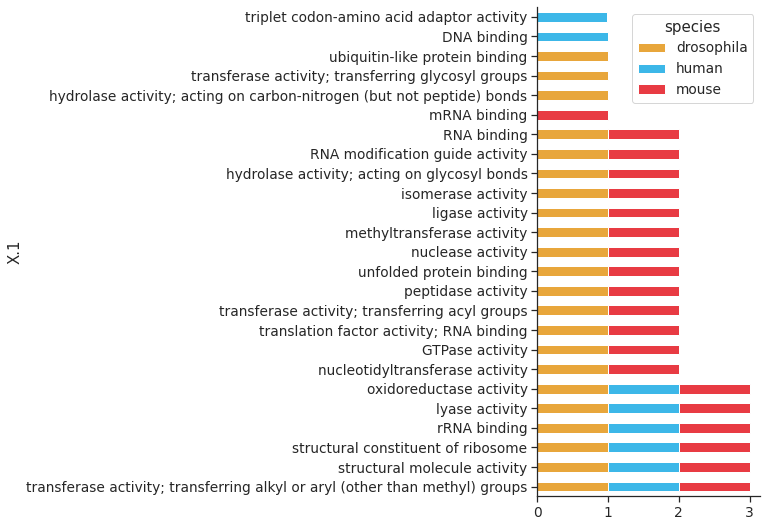

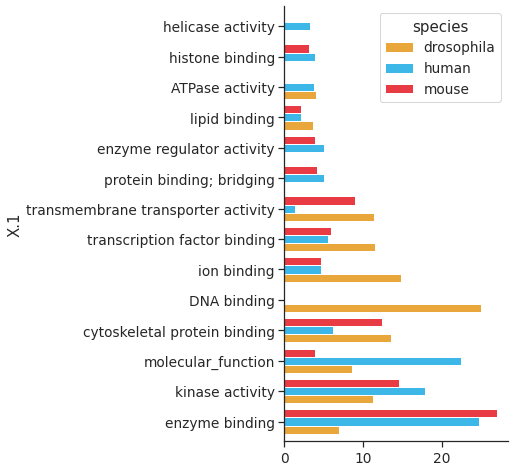

In [33]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp)


df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]
#df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(1-x) for x in df_whole['adjusted_P_val_agg']]




fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.axes_style("white")
sns.set_style("ticks")
#sns.despine()
df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] > 0.95]
df_hic_exp_enrich = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp_enrich.fillna(0, inplace=True)
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] = df_tmp['drosophila'] + df_tmp['human'] + df_tmp['mouse']
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['drosophila', 'human', 'mouse']].plot(kind='barh', stacked=True, figsize=(4, 9), zorder=2, color={"human": "#3CB7E8", "mouse": "#E83B43", "drosophila":"#E8A63B"} , ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
sns.set_style("ticks")

fig, ax = plt.subplots()
df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] < 0.05]
df_hic_exp_enrich = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_hic_exp_enrich.fillna(0, inplace=True)
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] = df_tmp['drosophila'] + df_tmp['human'] + df_tmp['mouse']
df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['drosophila', 'human', 'mouse']].plot(kind='barh', stacked=False, figsize=(4, 8), zorder=2, color={"human": "#3CB7E8", "mouse": "#E83B43", "drosophila":"#E8A63B"} , ax=ax, width=0.8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)
#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/hic_coexp_go_depleted.pdf', transparent=True, bbox_inches='tight')




species                                       human_mouse  mouse_drosophila
X.1                                                                        
ATPase activity                                  3.468402          1.377518
DNA binding                                           NaN          2.701043
cytoskeletal protein binding                     1.593308               NaN
enzyme binding                                   3.054254          2.899736
enzyme regulator activity                             NaN          1.445657
helicase activity                                1.409536               NaN
histone binding                                  2.531247          2.899736
hydrolase activity; acting on glycosyl bonds          NaN          1.778029
ion binding                                      5.240269               NaN
kinase activity                                  6.499448               NaN
lipid binding                                         NaN          1.737377


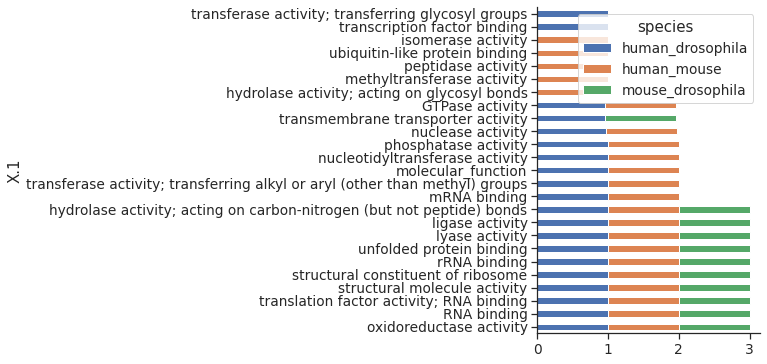

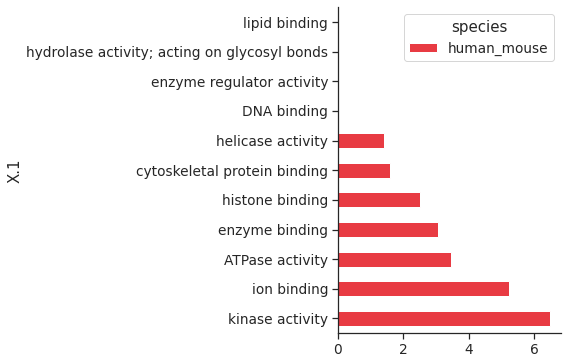

In [428]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_exp_subset)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
df_tmp['sort_col'] =  df_tmp['human_drosophila'] + df_tmp['human_mouse'] + df_tmp['mouse_drosophila']

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['human_drosophila', 'human_mouse', 'mouse_drosophila']].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2, )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] <= 0.05]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
#df_tmp.fillna(0, inplace=True)

df_tmp['sort_col'] =  df_tmp['human_mouse'] 

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )


ax = df_tmp[['human_mouse' ]].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2, color={ "human_mouse": "#E83B43", "drosophila":"#E8A63B"})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


species                                human_drosophila  human_mouse  \
X.1                                                                    
cell death                                     0.985162          1.0   
nitrogen cycle metabolic process               0.973101          1.0   
cellular amino acid metabolic process          0.973101          1.0   
cofactor metabolic process                     0.985162          1.0   
cell motility                                  0.967197          0.0   
...                                                 ...          ...   
nucleocytoplasmic transport                    0.000000          1.0   
cell wall organization or biogenesis           0.000000          1.0   
carbohydrate metabolic process                 0.000000          1.0   
protein targeting                              0.000000          1.0   
biological_process                             0.000000          1.0   

species                                mouse_drosophila  sort_c

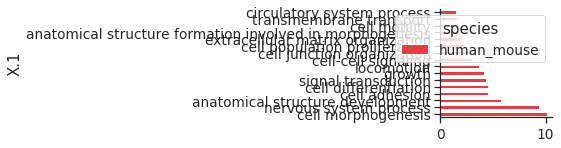

In [76]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_hic)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

df_whole_mp = df_whole[df_whole['X.2'] == 'biological_process']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
#print (df_tmp)
df_tmp['sort_col'] =  df_tmp['human_drosophila'] + df_tmp['mouse_drosophila']

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )
print (df_tmp)
#ax = df_tmp[['human_drosophila']].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2, color={ "mouse_human": "#E83B43", "drosophila":"#E8A63B"})
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

df_whole_mp = df_whole[df_whole['X.2'] == 'biological_process']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] <= 0.05]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
#df_tmp.fillna(0, inplace=True)

df_tmp['sort_col'] =  df_tmp['human_mouse'] 

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )
print (df_tmp)

ax = df_tmp[['human_mouse']].plot(kind='barh', stacked=True, figsize=(2, 2), zorder=2, color={ "human_mouse": "#E83B43", "drosophila":"#E8A63B"})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


Empty DataFrame
Columns: []
Index: []


KeyError: 'human_mouse'

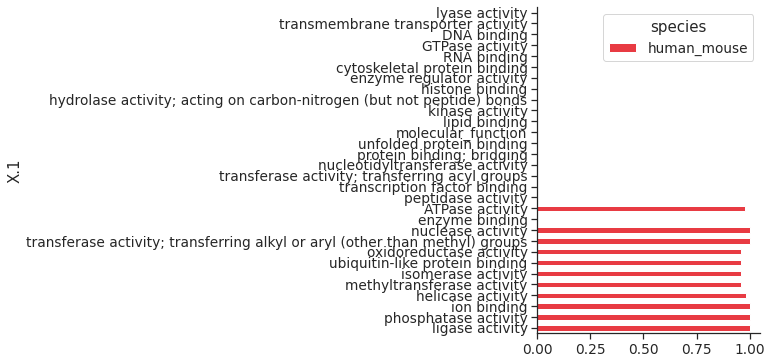

In [30]:
auc_GO_terms_manw = pd.concat(auc_GO_terms_manw_three_list_hic_hic_both_ways)

df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(auc_GO_terms_manw, left_on='X', right_on='id')


df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]
#print (df_whole)

df_whole_mp = df_whole[df_whole['X.2'] == 'molecular_function']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] >= 0.95]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg'].sum().unstack()
df_tmp.fillna(0, inplace=True)
#print (df_tmp)
#df_tmp['human_drosophila'] 
df_tmp['sort_col'] =  df_tmp['mouse_drosophila'] + df_tmp['human_mouse']

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )

ax = df_tmp[['human_mouse']].plot(kind='barh', stacked=True, figsize=(4, 6), zorder=2, color={ "human_mouse": "#E83B43", "drosophila":"#E8A63B"})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df_whole_mp = df_whole[df_whole['X.2'] == 'cellular component']
df_whole_mp  = df_whole_mp[df_whole_mp['adjusted_P_val_agg'] <= 0.05]
df_tmp = df_whole_mp[['species', 'adjusted_P_val_agg_log', 'X.1']].groupby(['X.1', 'species'])['adjusted_P_val_agg_log'].sum().unstack()
#df_tmp.fillna(0, inplace=True)
print (df_tmp)
df_tmp['sort_col'] =  df_tmp['human_mouse'] 

df_tmp.sort_values(['sort_col'], ascending=False, inplace=True, )


ax = df_tmp[['human_mouse' ]].plot(kind='barh', stacked=True, figsize=(2, 2), zorder=2, color={ "human_mouse": "#E83B43", "drosophila":"#E8A63B"})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [8]:
auc_GO_terms_manw.drop_duplicates(['species'])

id  P_val_agg    U1_stat           species  adjusted_P_val_agg
0  GO:0000003   0.120106  7225077.5       human_mouse            0.591633
0  GO:0000003   0.227629    95917.0  human_drosophila            0.860431
0  GO:0000003   0.431427   103667.0  mouse_drosophila            0.884294